# Preprocessing


# Setup

In [1]:
!pip install nltk

In [2]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generato

# About the Twitter dataset


In [3]:
# downloads sample twitter dataset
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [4]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [5]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))


print('The type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))

Number of positive tweets:  5000
Number of negative tweets:  5000
The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


In [6]:
all_positive_tweets[:20]

['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)',
 '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!',
 '@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!',
 '@97sides CONGRATS :)',
 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days',
 '@BhaktisBanter @PallaviRuhail This one is irresistible :)\n#FlipkartFashionFriday http://t.co/EbZ0L2VENM',
 "We don't like to keep our lovely customers waiting for long! We hope you enjoy! Happy Friday! - LWWF :) https://t.co/smyYriipxI",
 '@Impatientraider On second thought, there’s just not enough time for a DD :) But new shorts entering system. Sheep must be buying.',
 'Jgh , but we have to go to Bayan :D bye',
 'As an act of mischievousness, am calling the ETL layer of our in-house warehousing 

In [7]:
all_negative_tweets[:20]

['hopeless for tmr :(',
 "Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :(",
 '@Hegelbon That heart sliding into the waste basket. :(',
 '“@ketchBurning: I hate Japanese call him "bani" :( :(”\n\nMe too',
 'Dang starting next week I have "work" :(',
 "oh god, my babies' faces :( https://t.co/9fcwGvaki0",
 '@RileyMcDonough make me smile :((',
 '@f0ggstar @stuartthull work neighbour on motors. Asked why and he said hates the updates on search :( http://t.co/XvmTUikWln',
 'why?:("@tahuodyy: sialan:( https://t.co/Hv1i0xcrL2"',
 'Athabasca glacier was there in #1948 :-( #athabasca #glacier #jasper #jaspernationalpark #alberta #explorealberta #… http://t.co/dZZdqmf7Cz',
 "I have a really good m&amp;g idea but I'm never going to meet them :(((",
 '@Rampageinthebox mare ivan :(',
 '@SophiaMascardo happy trip, keep safe. see you soon :* :(',
 "I'm so tired hahahah :(",
 '@GrumpyCockney With knee replacements they get you up &amp; about the same day. :-(   Ou

# Preprocess raw text for Sentiment analysis

In [8]:
# download the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
from nltk.tokenize import word_tokenize

In [11]:
def process_sentence(sent):
  tokens = word_tokenize(sent)                           # read text and tokenize
  table = str.maketrans('', '', string.punctuation)      # removal of specific characters
  stripped = [w.translate(table) for w in tokens]        #removes punctuation characters
  words = [word for word in stripped if word.isalpha()]  # filters out non-alphabetic characters
  stop_words = set(stopwords.words('english'))
  words = [w for w in words if not w in stop_words]
  return " ".join(words)

In [12]:
all_tweets = all_negative_tweets + all_positive_tweets
text = [process_sentence(sent) for sent in all_tweets]

In [13]:
pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 86.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.5/268.5 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.1 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=e2741f631ac991c9cbe7cdbf747ca90e9fd6d50cb6cd098888f1b912c5df4bbc
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [14]:
from sentence_transformers import SentenceTransformer
#paraphrase-mpnet-base-v2 corpus of data used to train the model
model_bert = SentenceTransformer('paraphrase-mpnet-base-v2')

In [15]:
def vector_pdf_embedding(shu):
    # calculate weights for key words
    key_words_weights = np.array(list(key_words_new.values()))/np.sum(np.array(list(key_words_new.values())))
    # generate embeddings for each key word from top n list
    embeddings_key_words = model_bert.encode(list(key_words_new.keys()))
    # generate a embedding vector for pdf based on top key words
    vector_pdf = np.dot(key_words_weights,embeddings_key_words)
    return vector_pdf

In [16]:
embeddings_key_words = model_bert.encode(text)

In [17]:
X = embeddings_key_words

In [18]:
embeddings_key_words.shape

(10000, 768)

In [19]:
### Model

In [20]:
import numpy as np
X = embeddings_key_words
y=np.array([0]*5000 +[1]*5000)
print(X.shape)
print(y.shape)

(10000, 768)
(10000,)


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.2)

In [22]:
print(X_train.shape , X_test.shape)
print(y_train.shape , y_test.shape)

(8000, 768) (2000, 768)
(8000,) (2000,)


In [24]:
from keras import models
from keras import layers
from tensorflow.python.keras import regularizers


network= models.Sequential()
network.add(layers.Dense(256, input_shape=(768,), activation='leaky_relu',kernel_regularizer=regularizers.l2(0.001)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(128, activation='leaky_relu',kernel_regularizer=regularizers.l2(0.001)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(64, activation='leaky_relu',kernel_regularizer=regularizers.l2(0.001)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(2, activation='softmax'))
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               196864    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 1

In [25]:
network.compile(optimizer='SGD',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [26]:
history = network.fit(X_train,y_train ,batch_size=128,epochs=50, verbose=1, validation_split=0.1, shuffle = True)

Epoch 1/50
57/57 [==============================] - 3s 9ms/step - loss: 1.3530 - accuracy: 0.4929 - val_loss: 1.3274 - val_accuracy: 0.5387
Epoch 2/50
57/57 [==============================] - 0s 4ms/step - loss: 1.3379 - accuracy: 0.5167 - val_loss: 1.3200 - val_accuracy: 0.5962
Epoch 3/50
57/57 [==============================] - 0s 4ms/step - loss: 1.3304 - accuracy: 0.5369 - val_loss: 1.3136 - val_accuracy: 0.6187
Epoch 4/50
57/57 [==============================] - 0s 4ms/step - loss: 1.3186 - accuracy: 0.5506 - val_loss: 1.3070 - val_accuracy: 0.6375
Epoch 5/50
57/57 [==============================] - 0s 4ms/step - loss: 1.3199 - accuracy: 0.5492 - val_loss: 1.3007 - val_accuracy: 0.6612
Epoch 6/50
57/57 [==============================] - 0s 4ms/step - loss: 1.3122 - accuracy: 0.5635 - val_loss: 1.2944 - val_accuracy: 0.6850
Epoch 7/50
57/57 [==============================] - 0s 5ms/step - loss: 1.3053 - accuracy: 0.5711 - val_loss: 1.2875 - val_accuracy: 0.6988
Epoch 8/50
57/57 [==

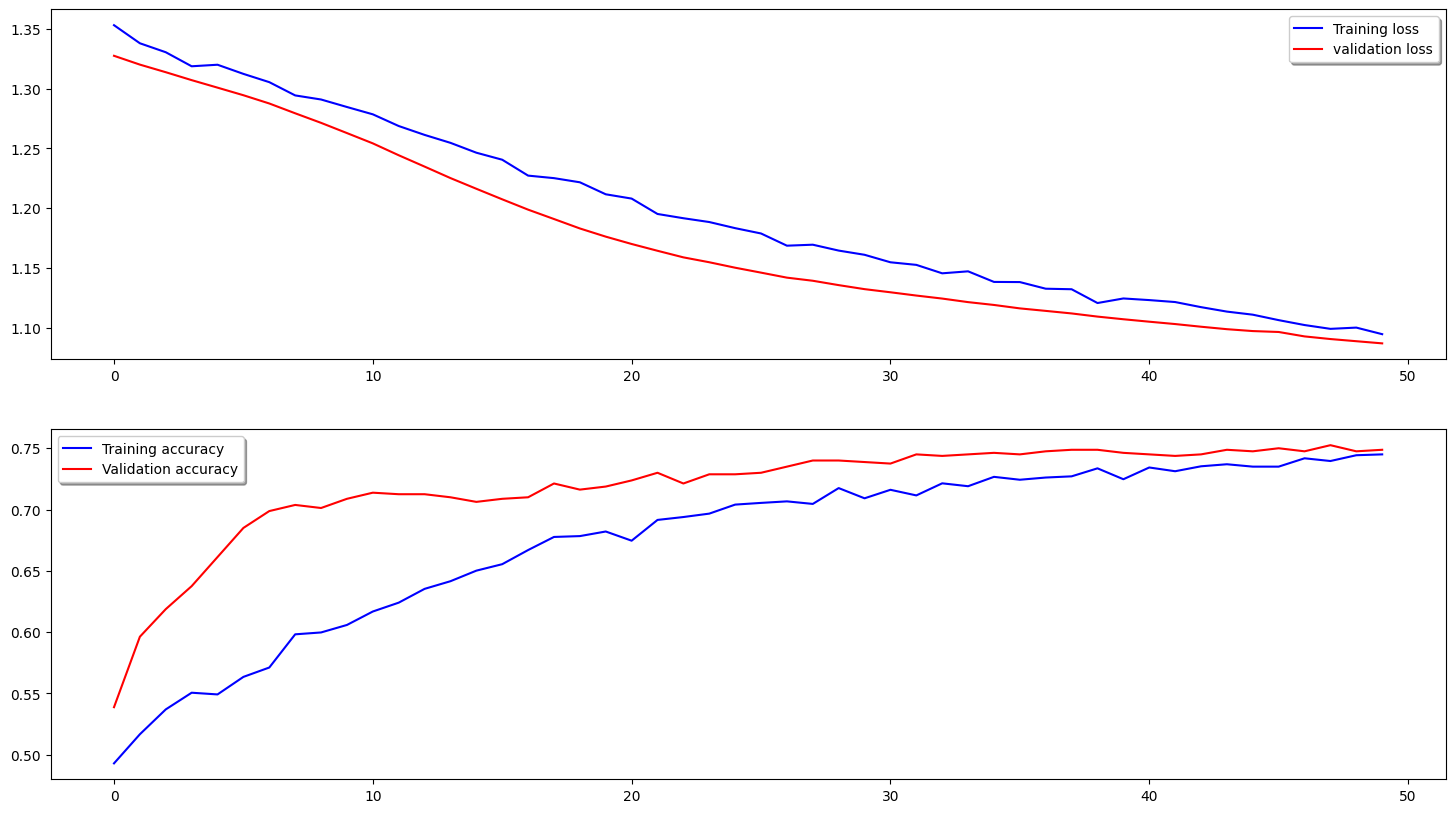

In [27]:
# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [28]:
pred_test_labels=network.predict(X_test).argmax(axis=1) #returns an array of predicted class labels for the test data.
                                                        #argmax(axis=1): This line finds the index of the class with the highest
                                                        #probability for each sample in the predicted probabilities array

63/63 [==============================] - 0s 2ms/step


<Axes: >

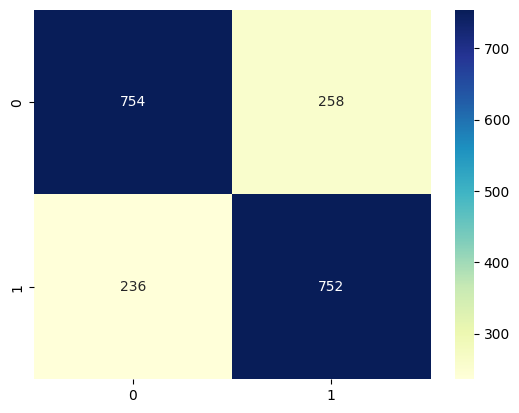

In [29]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,pred_test_labels), annot=True, fmt='d', cmap='YlGnBu')


In [34]:
#Let's make predictions from our selfs

def pred_tweets(sentence):
    d = {0: "Negative tweet", 1: "Positive tweet"}
    x=process_sentence(sentence)
    xembedding=model_bert.encode(x)
    pred_labels = network.predict(xembedding.reshape(1, -1)).argmax(axis=1)
    return d[pred_labels[0]]

my_tweet='Donald Trump is a good guy'
pred_tweets(my_tweet)


1/1 [==============================] - 0s 28ms/step


'Positive tweet'